# Proof of concept
## Concensiousness

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_validate
from sklearn.metrics import recall_score

## Import Data

In [30]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_02.set")

print(data_loo.info)
print(data_tst.info)

Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_02.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq:

Get data and reduce them

In [31]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
csp = CSP(n_components=6, transform_into='average_power')

x_csp_average = csp.fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 8 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-1.2914822  -0.88632756 -0.51320967 -1.92866471 -1.53036937 -0.805537  ]
 [-0.89208774 -0.35877956 -1.4335205  -1.70896103 -1.26420468  0.06993202]
 [-1.28082043 -1.83111204 -1.7105161   0.31088006 -1.58945684 -2.07868669]
 ...
 [-0.04988749 -0.4538856  -1.01266451 -1.21901488 -1.06053201 -0.01805965]
 [ 0.7344182  -0.5214834  -0.56665054  0.05419206 -0.80953653 -1.49719722]
 [-1.56027926 -0.66720475 -0.7227454  -0.80674

In [33]:
X2 = pd.DataFrame(x_csp_average)
X2

,0,1,2,3,4,5
0,-1.291482,-0.886328,-0.513210,-1.928665,-1.530369,-0.805537
1,-0.892088,-0.358780,-1.433521,-1.708961,-1.264205,0.069932
2,-1.280820,-1.831112,-1.710516,0.310880,-1.589457,-2.078687
3,-0.129464,-0.964238,-1.835661,-1.822631,-2.110521,-0.088511
4,-0.592715,-0.540658,-1.404375,-0.711744,-1.574846,-0.282342
...,...,...,...,...,...,...
475,-1.597987,-0.666707,-1.505596,0.047970,-0.838545,-1.707438
476,0.084863,-1.426108,-1.131338,-0.817489,-0.749081,-1.787761
477,-0.049887,-0.453886,-1.012665,-1.219015,-1.060532,-0.018060
478,0.734418,-0.521483,-0.566651,0.054192,-0.809537,-1.497197


### Entrainement d'un seul model

In [34]:
classifier = RandomForestClassifier()
cv = LeaveOneOut()

score = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=x_csp_average, y=y, scoring="accuracy")
score

{'fit_time': array([0.12942719, 0.12051272, 0.12054467, 0.12604737, 0.12353492,
        0.12750578, 0.12457037, 0.12953424, 0.12343407, 0.13104343,
        0.11735368, 0.12016916, 0.11647582, 0.11562824, 0.11751366,
        0.12019682, 0.12354755, 0.11665821, 0.11651945, 0.11855173,
        0.1175251 , 0.11928058, 0.11647868, 0.1181066 , 0.11978149,
        0.11372042, 0.11662126, 0.12622213, 0.11658835, 0.11703825,
        0.11562347, 0.11523032, 0.12258935, 0.11723924, 0.11753225,
        0.11558986, 0.11454964, 0.14004254, 0.11462474, 0.11462069,
        0.11661935, 0.11321521, 0.11662459, 0.11758542, 0.11561418,
        0.11466837, 0.11349201, 0.12598729, 0.11962056, 0.11454439,
        0.11758399, 0.11461496, 0.11561656, 0.11863756, 0.11720276,
        0.11558771, 0.11661768, 0.1146543 , 0.11420131, 0.11265206,
        0.11562014, 0.11461258, 0.12903905, 0.13351488, 0.12352324,
        0.11558604, 0.11658835, 0.11558986, 0.11559272, 0.11556315,
        0.17110705, 0.17983294, 0.17

In [35]:
cl = score["estimator"][0]
cl

RandomForestClassifier()

In [36]:
x_tst = data_tst.get_data()
y_tst = data_tst.events[:,2] - 1

x_csp_average_test = csp.transform(x_tst)
x_csp_average_test

array([[ 1.28453985, -1.11264367, -0.51769977, -0.9126218 , -0.59385353,
        -0.87488333],
       [ 1.19902168, -0.39986554,  0.06249661, -0.29163824, -0.85538807,
        -0.72179319],
       [-0.10670904, -1.52099123, -0.81614722,  0.42354686, -0.60397908,
        -0.06435189],
       ...,
       [-1.57051966, -1.30172233, -1.46471422, -1.73299095, -1.51230562,
        -0.99641528],
       [-0.89278672, -1.5037334 , -1.82430643, -0.52081341, -0.21268499,
        -1.88205055],
       [-1.51984772, -0.85753073, -0.76879766, -0.68484572, -0.57817211,
        -1.71860077]])

In [37]:
pred = cl.predict(x_csp_average_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

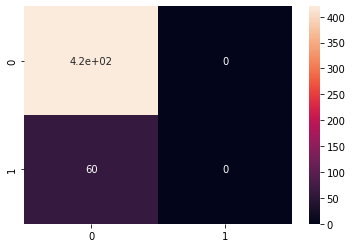

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

sns.heatmap(confusion_matrix(y_tst, pred), annot=True)

In [39]:
recall_score(y_pred=pred, y_true=y_tst)

0.0

In [40]:
max = 0
for estimator in score["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = recall_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

### Gradient bossting

In [50]:
from xgboost import XGBClassifier

boosted_tree = XGBClassifier()

score_tree = cross_validate(estimator=boosted_tree, cv=cv, return_estimator=True, X=x_csp_average, y=y, scoring="accuracy")
score_tree

{'fit_time': array([1.91423535, 0.04699564, 0.04350781, 0.04299521, 0.04150653,
        0.03999567, 0.04100275, 0.04450345, 0.04199481, 0.04450679,
        0.04099679, 0.04051256, 0.03899956, 0.04400373, 0.03999496,
        0.04100227, 0.04009867, 0.03699708, 0.03851151, 0.03899884,
        0.03900146, 0.03650498, 0.03699446, 0.03850985, 0.03899813,
        0.03800011, 0.03850627, 0.03799891, 0.03951049, 0.03699756,
        0.03750515, 0.04199481, 0.03799844, 0.05250812, 0.0389955 ,
        0.04050899, 0.03799367, 0.04051018, 0.03899693, 0.03800154,
        0.04750824, 0.03899813, 0.03951097, 0.04499626, 0.04050994,
        0.03999758, 0.03800178, 0.04050708, 0.04099631, 0.03950882,
        0.03999496, 0.03751183, 0.04199696, 0.03900313, 0.04250479,
        0.03899717, 0.04251218, 0.0399971 , 0.03850985, 0.041996  ,
        0.04200268, 0.04102349, 0.03898025, 0.03750467, 0.03899503,
        0.03750968, 0.03799915, 0.03900337, 0.03750467, 0.0399971 ,
        0.03651214, 0.03999829, 0.03

0.05


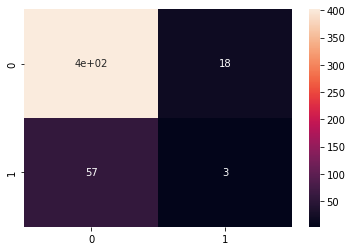

0.06666666666666667


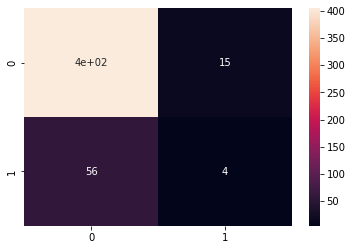

0.08333333333333333


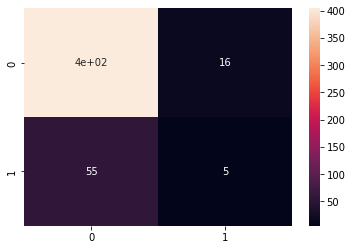

0.1


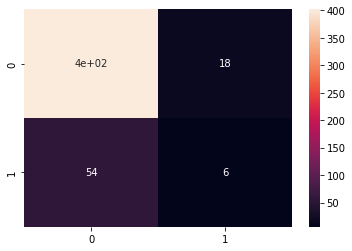

In [51]:
max = 0
for estimator in score_tree["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = recall_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

Conclusion

On remarque une bonne accuracy, mais celle ci est due à la mauvaise répartition des classes, il faut donc travailler sur ce point pour espérer avoir un meilleur recall

## Sampling

<AxesSubplot:>

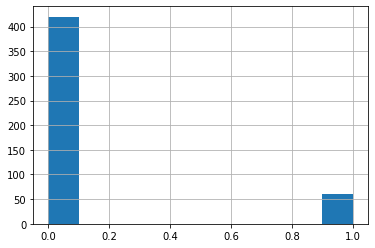

In [42]:
y = pd.Series(y)
y.hist()

On remaques que les classes sont très disproportionnées et que le modèles à donc des difficultés à apprendre

Nous allons maximiser le recall pour selectionner le meilleur model 

## SMOTE upper sampling

840


<AxesSubplot:>

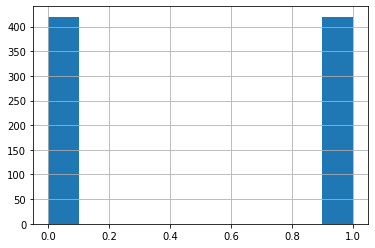

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X2, y)
print(len(y_smote))
y_smote.hist()

In [44]:
score_SMOTE = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=X_smote, y=y_smote, scoring="accuracy", n_jobs = -1)
score_SMOTE

{'fit_time': array([0.28956652, 0.30656576, 0.27956653, 0.34256625, 0.2915678 ,
        0.30956769, 0.31356859, 0.35257626, 0.28554392, 0.30255771,
        0.29155946, 0.29356194, 0.31356239, 0.30455923, 0.27156067,
        0.29356003, 0.28204727, 0.35507846, 0.2895577 , 0.27555728,
        0.29055882, 0.29055834, 0.29455829, 0.27555633, 0.33855677,
        0.30055499, 0.34206939, 0.29355478, 0.29355669, 0.31155586,
        0.29055715, 0.29955077, 0.29257107, 0.30656433, 0.28156328,
        0.27804947, 0.28204751, 0.27756071, 0.281564  , 0.30556369,
        0.28255773, 0.2825582 , 0.28704   , 0.2895565 , 0.2895546 ,
        0.27455568, 0.29355741, 0.27955055, 0.3015554 , 0.31706882,
        0.36056066, 0.34355974, 0.3720746 , 0.35007548, 0.33556008,
        0.28955841, 0.30357695, 0.30757689, 0.31357265, 0.29757571,
        0.31409001, 0.3235786 , 0.30757809, 0.29757953, 0.25555706,
        0.270051  , 0.21604133, 0.30155969, 0.29955935, 0.28855848,
        0.28755903, 0.35907626, 0.26

0.18333333333333332


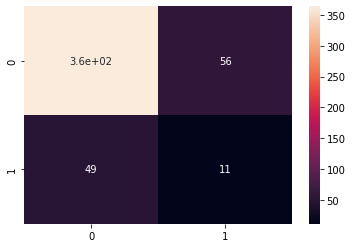

0.2


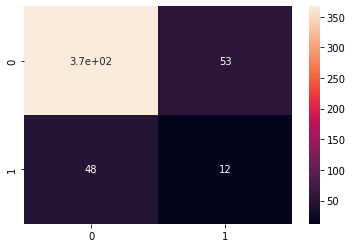

0.21666666666666667


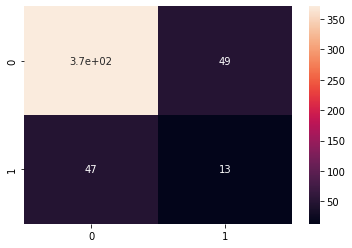

In [45]:
max = 0
for estimator in score_SMOTE["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = recall_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

# Near Miss undersampler

In [46]:
from imblearn.under_sampling import NearMiss

u_s = NearMiss()
X_nm, y_nm = u_s.fit_resample(X2, y)

In [47]:
len(y_nm)

120

In [48]:
score_us = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=X_smote, y=y_smote, scoring="accuracy", n_jobs = -1)
score_us

{'fit_time': array([0.28956699, 0.28756762, 0.2785697 , 0.32357192, 0.29157066,
        0.28856611, 0.34157324, 0.32457423, 0.30957317, 0.28655696,
        0.28804755, 0.29156804, 0.31656837, 0.27056885, 0.28257108,
        0.2815671 , 0.2865715 , 0.2815733 , 0.32957387, 0.32257318,
        0.28657532, 0.29656529, 0.3245728 , 0.30257535, 0.27657652,
        0.27657437, 0.28156853, 0.314569  , 0.28257227, 0.29757571,
        0.29857254, 0.27757192, 0.27656841, 0.30757189, 0.28305793,
        0.27757263, 0.29504848, 0.29856491, 0.29556537, 0.30956817,
        0.28155923, 0.28356481, 0.27756667, 0.27756739, 0.26656532,
        0.30656886, 0.28256631, 0.32108831, 0.28706098, 0.30456519,
        0.28156686, 0.30607724, 0.28256226, 0.26855421, 0.26604795,
        0.30755806, 0.2650373 , 0.30556417, 0.28204513, 0.32156205,
        0.29256248, 0.28355622, 0.32957315, 0.30808687, 0.31957436,
        0.31457043, 0.30257583, 0.28757644, 0.28957796, 0.27757835,
        0.29257536, 0.28757286, 0.29

0.15


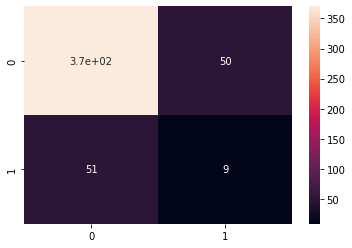

0.18333333333333332


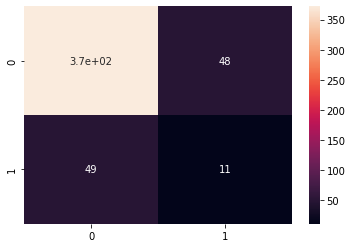

0.2


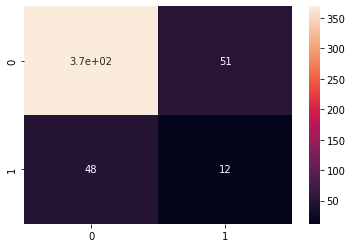

0.23333333333333334


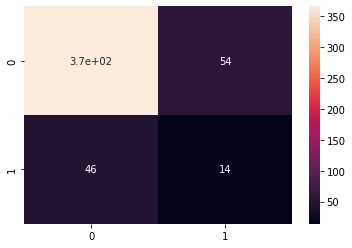

In [49]:

max = 0
for estimator in score_us["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = recall_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        max_estimator = pred
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()